In [76]:
from pdfminer.pdfparser import PDFParser #PDFParser fetches data from a file
from pdfminer.pdfdocument import PDFDocument #PDFDocument stores it
from pdfminer.pdfinterp import PDFPageInterpreter, PDFResourceManager
#PDFPageInterpreter to process the page contents
# PDFResourceManager is used to store shared resources such as fonts or images
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import io
#PDFDevice to translate it

def pdfToTextConverter(data):
    fp = open(data, 'rb')
    pdfResrcMgr = PDFResourceManager()
    retstr = io.StringIO()
    laparams = LAParams()
    
    device = TextConverter(pdfResrcMgr, retstr, laparams=laparams)
    
    # Create a PDF interpreter object.
    interpreter = PDFPageInterpreter(pdfResrcMgr, device)
    
    # Process each page contained in the document.
    for page in PDFPage.get_pages(fp):
        interpreter.process_page(page)
        data =  retstr.getvalue()

    return data

if __name__ == '__main__':
    file = pdfToTextConverter('alchemist.pdf')
    
    with open('alchemist.txt',"wb") as txtFile:
        txtFile.write(file.encode("utf-8"))

In [77]:
f = open('alchemist.txt','r')
text1 = f.read()
f.close()
text1

'Paulo Coelho - The Alchemist\n\nPage 1 / 94\n\nThe Alchemist \n\n- Paulo Coelho\n\nTranslated by Alan R. Clarke. Published 1992.\nISBN 0-7225-3293-8.\n\n= CONTENTS = \n\nPart One \nPart Two \nEpilogue \n\n \n\nPART ONE \n\nThe boy\'s name was Santiago. Dusk was falling as the boy arrived with his \nherd at an abandoned church. The roof had fallen in long ago, and an \nenormous sycamore had grown on the spot where the sacristy had once \nstood. \n\nHe decided to spend the night there. He saw to it that all the sheep entered \nthrough the ruined gate, and then laid some planks across it to prevent the \nflock from wandering away during the night. There were no wolves in the \nregion, but once an animal had strayed during the night, and the boy had \nhad to spend the entire next day searching for it. \n\nHe swept the floor with his jacket and lay down, using the book he had just \nfinished reading as a pillow. He told himself that he would have to start \nreading thicker books: they last

In [78]:
from wordcloud import *
import nltk
from nltk.corpus import stopwords 
#nltk stands for National Language Tool Kit. 
#It gets a list of all stopwords from a language
#Stop words come inbuilt with a list of stop words for all main language.

from nltk.tokenize import word_tokenize #Tokens means set of words in a document.
from nltk.corpus import wordnet

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishalk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
#Stop words for English language
# |Nltk comes inbuilt with a list of stop words for all main languages. To see the stop words for English:
sw = stopwords.words('english')
sw = str(sw)
sw

'[\'i\', \'me\', \'my\', \'myself\', \'we\', \'our\', \'ours\', \'ourselves\', \'you\', "you\'re", "you\'ve", "you\'ll", "you\'d", \'your\', \'yours\', \'yourself\', \'yourselves\', \'he\', \'him\', \'his\', \'himself\', \'she\', "she\'s", \'her\', \'hers\', \'herself\', \'it\', "it\'s", \'its\', \'itself\', \'they\', \'them\', \'their\', \'theirs\', \'themselves\', \'what\', \'which\', \'who\', \'whom\', \'this\', \'that\', "that\'ll", \'these\', \'those\', \'am\', \'is\', \'are\', \'was\', \'were\', \'be\', \'been\', \'being\', \'have\', \'has\', \'had\', \'having\', \'do\', \'does\', \'did\', \'doing\', \'a\', \'an\', \'the\', \'and\', \'but\', \'if\', \'or\', \'because\', \'as\', \'until\', \'while\', \'of\', \'at\', \'by\', \'for\', \'with\', \'about\', \'against\', \'between\', \'into\', \'through\', \'during\', \'before\', \'after\', \'above\', \'below\', \'to\', \'from\', \'up\', \'down\', \'in\', \'out\', \'on\', \'off\', \'over\', \'under\', \'again\', \'further\', \'then\', 

In [80]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)
text1_tok = token.tokenize(text1)
text1_tok

['Paulo',
 ' ',
 ' ',
 'Coelho',
 ' ',
 ' ',
 'The',
 ' ',
 ' ',
 'Alchemist',
 '\n',
 '\n',
 'Page',
 ' ',
 ' ',
 '1',
 ' ',
 ' ',
 '94',
 '\n',
 '\n',
 'The',
 ' ',
 ' ',
 'Alchemist',
 ' ',
 ' ',
 'Paulo',
 ' ',
 ' ',
 'Coelho',
 '\n',
 '\n',
 'Translated',
 ' ',
 ' ',
 'by',
 ' ',
 ' ',
 'Alan',
 ' ',
 ' ',
 'R',
 ' ',
 ' ',
 'Clarke',
 ' ',
 ' ',
 'Published',
 ' ',
 ' ',
 '1992',
 '\n',
 '\n',
 'ISBN',
 ' ',
 ' ',
 '0',
 '-',
 '-',
 '7225',
 '-',
 '-',
 '3293',
 ' ',
 ' ',
 'CONTENTS',
 '\n',
 '\n',
 'Part',
 ' ',
 ' ',
 'One',
 '\n',
 '\n',
 'Part',
 ' ',
 ' ',
 'Two',
 '\n',
 '\n',
 'Epilogue',
 '\n',
 '\n',
 'PART',
 ' ',
 ' ',
 'ONE',
 '\n',
 '\n',
 'The',
 ' ',
 ' ',
 'boy',
 "'",
 "'",
 's',
 ' ',
 ' ',
 'name',
 ' ',
 ' ',
 'was',
 ' ',
 ' ',
 'Santiago',
 ' ',
 ' ',
 'Dusk',
 ' ',
 ' ',
 'was',
 ' ',
 ' ',
 'falling',
 ' ',
 ' ',
 'as',
 ' ',
 ' ',
 'the',
 ' ',
 ' ',
 'boy',
 ' ',
 ' ',
 'arrived',
 ' ',
 ' ',
 'with',
 ' ',
 ' ',
 'his',
 '\n',
 '\n',
 'herd',
 ' ',
 ' 

In [81]:
i = ""
clean1 = [x.lower() for x in text1_tok]
clean1
clean1 = [x for x in clean1 if x not in sw]
clean1
clean2 = [i for i in clean1 if i.isalnum()]
clean2
clean2 = [i for i in clean2 if not i.isdigit()]
clean2

['paulo',
 'coelho',
 'alchemist',
 'page',
 'alchemist',
 'paulo',
 'coelho',
 'translated',
 'alan',
 'clarke',
 'published',
 'isbn',
 'contents',
 'part',
 'one',
 'part',
 'two',
 'epilogue',
 'part',
 'one',
 'boy',
 'name',
 'santiago',
 'dusk',
 'falling',
 'boy',
 'arrived',
 'herd',
 'abandoned',
 'church',
 'roof',
 'fallen',
 'long',
 'ago',
 'enormous',
 'sycamore',
 'grown',
 'spot',
 'sacristy',
 'stood',
 'decided',
 'spend',
 'night',
 'saw',
 'sheep',
 'entered',
 'ruined',
 'gate',
 'laid',
 'planks',
 'across',
 'prevent',
 'flock',
 'wandering',
 'away',
 'night',
 'wolves',
 'region',
 'animal',
 'strayed',
 'night',
 'boy',
 'spend',
 'entire',
 'next',
 'day',
 'searching',
 'swept',
 'floor',
 'jacket',
 'lay',
 'using',
 'book',
 'finished',
 'reading',
 'pillow',
 'told',
 'start',
 'reading',
 'thicker',
 'books',
 'lasted',
 'longer',
 'made',
 'comfortable',
 'pillows',
 'still',
 'dark',
 'awoke',
 'looking',
 'see',
 'stars',
 'half',
 'destroyed',
 'roo

In [82]:
#Frequency of words in the bag of token
import pandas as pd
tokensSeries = pd.Series(clean2)
unique = tokensSeries.loc[tokensSeries.duplicated()]
unique
vc = unique.value_counts().sort_values(ascending = False)
vc

boy           527
said          314
alchemist     247
one           183
desert        178
             ... 
brings          1
praying         1
success         1
looks           1
generosity      1
Length: 1667, dtype: int64

In [92]:
clean2 = unique.tolist()
clean2
clean3 = '\n'.join(clean2)
clean3

'alchemist\npaulo\ncoelho\npart\npart\none\nboy\nnight\nnight\nboy\nspend\nreading\nroof\npaulo\ncoelho\nalchemist\npage\nlonger\nnight\nago\nsheep\nstill\nawoke\nbegan\nsheep\ntwo\nschedule\nlonger\nawaken\nboy\none\none\ncrook\nname\nsheep\nbooks\nmade\npast\none\ndays\nvillage\nmerchant\nalways\nsheep\ntold\nboy\nshop\nsheep\nboy\ntold\nmerchant\nshop\nshepherd\nboy\nshop\ntook\nbook\nknow\nread\nsaid\ngirl\ngirl\nregion\nsheep\nbooks\ntwo\ntold\nmerchant\ndaughter\nlife\nvillage\nday\nshepherd\ntold\ncountryside\nsheep\npaulo\ncoelho\nalchemist\npage\nlearn\nread\ngirl\nasked\none\nlike\nsaid\nwell\nknow\nread\nshepherd\nboy\ngirl\nunderstand\nmoorish\neyes\nwent\npassed\nboy\nday\nnever\nbusy\ndays\nnever\none\ngirl\nhair\ndays\nnever\nmerchant\nasked\nboy\nfour\nsheep\nwool\nasked\nshepherd\nyear\nfour\ndays\nback\nvillage\ntime\ngirl\nshepherds\npassed\nwool\nsaid\nsheep\nknow\nknew\nmatter\nknew\nshepherds\nlike\nlike\nalways\nfound\nwandering\nday\nshepherd\nsheep\nnever\nmake

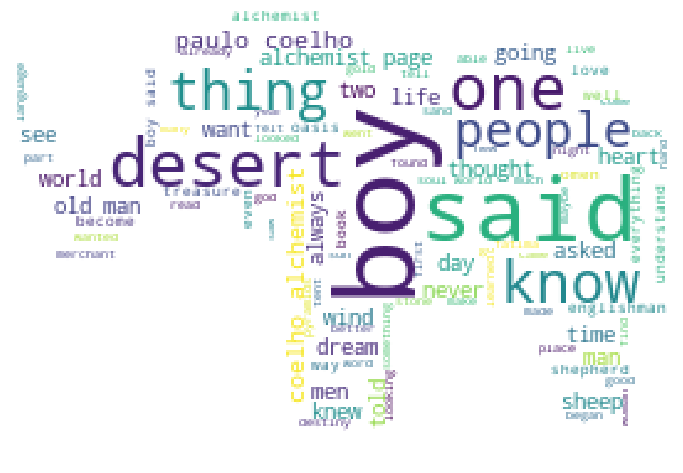

In [97]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

user_mask = np.array(Image.open('lefant.jpg'))
user_mask
wordcloud = WordCloud(background_color='white',mask=user_mask).generate(clean3) 
# clean3 is the final input text - completely clean

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()